In [1]:
import underworld as uw
import matplotlib as mpl
from matplotlib.figure import Figure
import matplotlib.pyplot as pyplot
import numpy as np
import math
import h5py
import glob
import UWGeodynamics as GEO
#from MechanicalProperties import PlateProperties
from pathlib import Path
import sys
import underworld.function as fn
#import glucifer
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.offsetbox import AnchoredText

loaded rc file /opt/venv/lib/python3.7/site-packages/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
!pwd

/home/jovyan/user_data/Paper_1_notebooks_Figures


In [3]:
def getColoursfromMap(cmapKey,NumColours):
    cmap = plt.get_cmap(cmapKey)
    norm = mcolors.Normalize(vmin=0, vmax=NumColours)
    #Base array to calculate the colors
    seedColors=np.arange(0,NumColours,1)
    colours=cmap(norm(seedColors))
    return colours

def genStdColorArray(Thicknesses,colors,colorflip):
    iColor=0
    limitThick=colorflip[1]
    plotCounter=0
    #Get Colors and put them into an array
    ColorsS=[]
    colorC=0
    for j in colors:
        ColorsS.append(getColoursfromMap(colors[colorC],len(Thicknesses)))
        colorC=colorC+1
    counter=0
    #array which will contain colors to return    
    FinalColours=[]
    
    for i in Thicknesses:
        #Color changes
        if colorflip[0]==True:
            if limitThick> i:
                Colors=ColorsS[0]
            elif limitThick<=i:
                Colors=ColorsS[1]    
            else:
                Colors=ColorsS[0]     
        color=Colors[counter]
        FinalColours.append(color)
        counter=counter+1
    return FinalColours

def loadViscousDissTime_Thicknesses(DataDir,thickness,fileSeed,areaType):
    fileName=DataDir+fileSeed+"{0}km.txt".format(str(thickness))
    Data = np.genfromtxt(fileName, dtype=float)
    if areaType=="whole":
        t,VisDiss=Data[:,0],Data[:,1]
    elif areaType=="Lithosphere":
        t,VisDiss=Data[:,0],Data[:,2]
    elif areaType=="Mantle":
        t,VisDiss=Data[:,0],Data[:,3]
    return t,VisDiss

def velocitiesLoader(DataDir,thickness,typePlot,fileSeed):
    fileName=DataDir+fileSeed+"{0}.txt".format(str(thickness))
    Data = np.genfromtxt(fileName, dtype=float,skip_footer=1)
    if typePlot=="subduction_velocity":
        t,vel=Data[:,0],Data[:,1]
    elif typePlot=="Trench_retreat_vel":
        t,vel=Data[:,0],Data[:,2]
    elif typePlot=="OP_retreat_vel":
        t,vel=Data[:,0],Data[:,3]
    return t,vel

In [38]:
from matplotlib.offsetbox import AnchoredText
#Time_array,SPVel,OPVel,arcVel,cratVel,Xlabel,figsize,Thicknesses,thicknessLabel,Colors
def plotIntegratedDiss_allTimesSingle_vel(seed1,seed2,thicknesses,Colors,figsize):
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    #PLots to include in the subplots
    Nplots=2
    areaTypes=["Lithosphere","whole"]#,"Mantle"]
    labelTitles=["Lithosphere","Whole domain","Asthenosphere"]
    markers=["","",""]
    #markers=["v","+","^"]
    lineStyles=["-","-"]
    #Figure parameters
    fig, axs = pyplot.subplots(3,1,figsize=figsize,sharex=True)
    #axs[1].set_title("Viscous Dissipation vs time ",size=16) 
    #axs[0].set_title("Convergence velocity vs time ",size=16) 
    Max=0
    Min=0
    ax=axs[1]
    ax1=axs[2]
#     line3,=ax.plot([-10,-100000],linewidth=0.7,color='black',marker=markers[0],label=labelTitles[0],markersize=4)
#     ax.legend(fontsize=int(10),fancybox=True)
#     line4,=ax.plot([-10,-100000],linewidth=0.7,color='black',marker=markers[1],label=labelTitles[1],markersize=4)
#     ax.leg end(fontsize=5,fancybox=True)
    plotCounter=0
    for j in areaTypes:
        seed=axs[plotCounter+1]
        #line2,=ax.plot(label='{0}'.format(labelTitles[plotCounter])),linewidth=0.4,color=Colors[counter],marker=markers[plotCounter],markersize=3,markevery=5)
        counter=0
        #ax2=ax.twinx()
        for i in thicknesses:

    #Make plot
            #t,intVDiss=integrateViscDiss_allTimes(seed1,seed2,Model,i,0,55,dirFiles,j)
            t,intVDiss=loadViscousDissTime_Thicknesses("/home/jovyan/user_data/ViscousDissIntegral_data/",i,"ViscousDissipation_",j)
            #plot parameters
            seed.set_ylabel("Viscous Dissipation (W/m)",labelpad=2,fontsize=8)
            if i==0:
                colour='black'
            else:
                colour=Colors[counter]
            #plot data
            line1,=seed.plot(t,intVDiss/1e4,linewidth=0.7,color=colour,marker=markers[plotCounter],
                      markersize=3.0,markevery=5,linestyle=lineStyles[plotCounter])
            seed.set_xlim(0,50)
#             if plotCounter==0:
#                 line2,=seed1.plot(t,intVDiss/1e4,label='{0} Km'.format((eval(str(i)))),linewidth=0.7,
#                           color=Colors[counter])
#                 #seed.legend(fontsize=int(8.5),fancybox=True)
                #seed.legend(fontsize=int(10))   
            seed.tick_params(axis = 'both', which = 'major', labelsize = 8)
            #Anchored text as title
            #anchored_title=AnchoredText(labelTitles[plotCounter],loc='upper left',pad=0.4,borderpad=0.4,frameon=False,prop=dict(size=12))
            #seed.add_artist(anchored_title)
            Max=(max(intVDiss))/1e4
            counter=counter+1
        seed.set_xlabel("Time (Ma)",labelpad=2,fontsize=8)
        seed.set_ylim(0,Max+Max*1/6)
        seed.axvline(x=16,ymin=Min+1/3*Min,ymax=Max+2*Max,linestyle='--',color='black',linewidth=0.7,alpha=0.4)
        seed.axvline(x=22.5,ymin=Min+1/3*Min,ymax=Max+2*Max,linestyle='--',color='black',linewidth=0.7,alpha=0.4)
        seed.axvline(x=34,ymin=Min+1/3*Min,ymax=Max+2*Max,linestyle='--',color='black',linewidth=0.7,alpha=0.4)
        adjustX=(0+50)/10.
        arrangeTicksX=np.arange(0,51,adjustX)
        seed.xaxis.set_ticks(arrangeTicksX)
        plotCounter=plotCounter+1
    
    #Velocity axis settings
    typePlots=["subduction_velocity","Trench_retreat_vel","OP_retreat_vel","Arc_retreat_vel"]
    names=["Subducting plate","Trench-retreat velocity vs Time","OP retreat velocity vs Time","Arc retreat velocity vs Time"]
    
    counter=0
    Max=0
    Min=0
    #Loop for iterating thicknesses
    for i in thicknesses:
        seed=axs[0]
        plotType=typePlots[0]
        #Have to replace this line for the loading function..
        #t,vel=getTypeVelocity(plotType,Time_array,counter,SPVel,cratVel,OPVel,arcVel)
        t,vel=velocitiesLoader('/home/jovyan/user_data/placeVelocitiesData/',i,plotType,"platesVelocities_")
        if i==0:
            colour='black'
        else:
            colour=Colors[counter]
        seed.plot(t,vel,label='{0} Km'.format((eval(str(i)))),linewidth=0.7,color=colour)
        seed.set_ylabel("Velocity (cm/yr)",labelpad=2,fontsize=8)
        #seed.legend(fontsize=int(8.5),fancybox=True)
        seed.tick_params(axis = 'both', which = 'major', labelsize =8) 
        seed.set_xlim(0,45)
        #seed.yaxis.set_major_locator(mpl.ticker.LinearLocator(5))
        Max=max(vel)
        Min=min(vel)
        seed.set_ylim((1.52*Min),Max*1.541)
        #Title from loadaed file
        #anchored_title=AnchoredText(names[0],loc='upper center',pad=0.5,borderpad=0.5,frameon=False,prop=dict(size=15))
        #seed.add_artist(anchored_title)
            
        counter=counter+1
           
    counter=counter-1
    seed.set_xlabel("Time (Ma)",labelpad=2,fontsize=8)
    seed.axhline(y=0, xmin=0, xmax=max(t)+max(t)/6.,color='black',linestyle='--',linewidth=0.7,alpha=0.4)
    seed.axvline(x=16,ymin=-10,ymax=10,linestyle='--',color='black',linewidth=0.7,alpha=0.4)
    seed.axvline(x=22.5,ymin=-10,ymax=10,linestyle='--',color='black',linewidth=0.7,alpha=0.4)
    seed.axvline(x=34,ymin=-10,ymax=10,linestyle='--',color='black',linewidth=0.7,alpha=0.4)
    
            
    adjustX=(0+45)/9.
    #Arrange ticks Array
    arrangeTicksX=np.arange(0,46,adjustX)
    #Ticks Change
    seed.xaxis.set_ticks(arrangeTicksX)
            
    plotCounter=plotCounter+1    
        
        
    fig.tight_layout(pad=1.,h_pad=0.08,w_pad=0.4)
    pyplot.subplots_adjust(wspace=0, hspace=0)
    #pyplot.subplots_adjust(wspace=0, hspace=0)
    %matplotlib
    return fig

from matplotlib.offsetbox import AnchoredText
#Time_array,SPVel,OPVel,arcVel,cratVel,Xlabel,figsize,Thicknesses,thicknessLabel,Colors
def plotIntegratedDiss_allTimesSingle_vel(seed1,seed2,thicknesses,Colors,figsize):
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    #PLots to include in the subplots
    Nplots=2
    areaTypes=["Lithosphere","whole"]#,"Mantle"]
    labelTitles=["Lithosphere","Whole domain","Asthenosphere"]
    markers=["v","+","^"]
    lineStyles=["-","--"]
    #Figure parameters
    fig, axs = pyplot.subplots(3,1,figsize=figsize,sharex=True)
    #axs[1].set_title("Viscous Dissipation vs time ",size=16) 
    #axs[0].set_title("Convergence velocity vs time ",size=16) 
    Max=0
    Min=0
    ax=axs[1]
    ax1=
    line3,=ax.plot([-10,-100000],linewidth=0.7,color='black',marker=markers[0],label=labelTitles[0],markersize=4)
    ax.legend(fontsize=int(10),fancybox=True)
    line4,=ax.plot([-10,-100000],linewidth=0.7,color='black',marker=markers[1],label=labelTitles[1],markersize=4)
    ax.legend(fontsize=5,fancybox=True)
    plotCounter=0
    for j in areaTypes:
        #line2,=ax.plot(label='{0}'.format(labelTitles[plotCounter])),linewidth=0.4,color=Colors[counter],marker=markers[plotCounter],markersize=3,markevery=5)
        counter=0
        #ax2=ax.twinx()
        for i in thicknesses:
            seed=axs[1]
            seed1=axs[2]
    #Make plot
            #t,intVDiss=integrateViscDiss_allTimes(seed1,seed2,Model,i,0,55,dirFiles,j)
            t,intVDiss=loadViscousDissTime_Thicknesses("/home/jovyan/user_data/ViscousDissIntegral_data/",i,"ViscousDissipation_",j)
            #plot parameters
            seed.set_ylabel("Viscous Dissipation (W/m)",labelpad=2,fontsize=8)
            if i==0:
                colour='black'
            else:
                colour=Colors[counter]
            #plot data
            line1,=seed.plot(t,intVDiss/1e4,linewidth=0.6,color=colour,marker=markers[plotCounter],
                      markersize=3.0,markevery=5,linestyle=lineStyles[plotCounter])
            seed.set_xlim(0,50)
            if plotCounter==0:
                line2,=seed.plot(t,intVDiss/1e4,label='{0} Km'.format((eval(str(i)))),linewidth=0.6,
                          color=Colors[counter])
                #seed.legend(fontsize=int(8.5),fancybox=True)
                #seed.legend(fontsize=int(10))   
            seed.tick_params(axis = 'both', which = 'major', labelsize = 8)
            #Anchored text as title
            #anchored_title=AnchoredText(labelTitles[plotCounter],loc='upper left',pad=0.4,borderpad=0.4,frameon=False,prop=dict(size=12))
            #seed.add_artist(anchored_title)
            Max=(max(intVDiss))/1e4
            counter=counter+1
        seed.set_xlabel("Time (Ma)",labelpad=2,fontsize=8)
        seed.set_ylim(0,Max+Max*1/6)
        #Phases in Y-parallel lines
        #seed.axhline(y=0, xmin=0, xmax=60,color='black',linestyle='--',linewidth=0.3)
        seed.axvline(x=16,ymin=Min+1/3*Min,ymax=Max+2*Max,linestyle='--',color='black',linewidth=0.7,alpha=0.4)
        seed.axvline(x=22.5,ymin=Min+1/3*Min,ymax=Max+2*Max,linestyle='--',color='black',linewidth=0.7,alpha=0.4)
        seed.axvline(x=34,ymin=Min+1/3*Min,ymax=Max+2*Max,linestyle='--',color='black',linewidth=0.7,alpha=0.4)
        adjustX=(0+50)/10.
        arrangeTicksX=np.arange(0,51,adjustX)
        seed.xaxis.set_ticks(arrangeTicksX)
        plotCounter=plotCounter+1
    
    #Velocity axis settings
    typePlots=["subduction_velocity","Trench_retreat_vel","OP_retreat_vel","Arc_retreat_vel"]
    names=["Subducting plate","Trench-retreat velocity vs Time","OP retreat velocity vs Time","Arc retreat velocity vs Time"]
    
    counter=0
    Max=0
    Min=0
    #Loop for iterating thicknesses
    for i in thicknesses:
        seed=axs[0]
        plotType=typePlots[0]
        #Have to replace this line for the loading function..
        #t,vel=getTypeVelocity(plotType,Time_array,counter,SPVel,cratVel,OPVel,arcVel)
        t,vel=velocitiesLoader('/home/jovyan/user_data/placeVelocitiesData/',i,plotType,"platesVelocities_")
        if i==0:
            colour='black'
        else:
            colour=Colors[counter]
        seed.plot(t,vel,label='{0} Km'.format((eval(str(i)))),linewidth=0.7,color=colour)
        seed.set_ylabel("Velocity (cm/yr)",labelpad=2,fontsize=8)
        #seed.legend(fontsize=int(8.5),fancybox=True)
        seed.tick_params(axis = 'both', which = 'major', labelsize =8) 
        seed.set_xlim(0,50)
        #seed.yaxis.set_major_locator(mpl.ticker.LinearLocator(5))
        Max=max(vel)
        Min=min(vel)
        seed.set_ylim((1.52*Min),Max*1.541)
        #Title from loadaed file
        #anchored_title=AnchoredText(names[0],loc='upper center',pad=0.5,borderpad=0.5,frameon=False,prop=dict(size=15))
        #seed.add_artist(anchored_title)
            
        counter=counter+1
           
    counter=counter-1
    seed.set_xlabel("Time (Ma)",labelpad=2,fontsize=8)
    seed.axhline(y=0, xmin=0, xmax=max(t)+max(t)/6.,color='black',linestyle='--',linewidth=0.7,alpha=0.4)
    seed.axvline(x=16,ymin=-10,ymax=10,linestyle='--',color='black',linewidth=0.7,alpha=0.4)
    seed.axvline(x=22.5,ymin=-10,ymax=10,linestyle='--',color='black',linewidth=0.7,alpha=0.4)
    seed.axvline(x=34,ymin=-10,ymax=10,linestyle='--',color='black',linewidth=0.7,alpha=0.4)
    
            
    adjustX=(0+50)/10.
    #Arrange ticks Array
    arrangeTicksX=np.arange(0,51,adjustX)
    #Ticks Change
    seed.xaxis.set_ticks(arrangeTicksX)
            
    plotCounter=plotCounter+1    
        
        
    fig.tight_layout(pad=1.,h_pad=0.08,w_pad=0.4)
    #pyplot.subplots_adjust(wspace=0, hspace=0)
    %matplotlib
    return fig

In [39]:
#Model parameters and directories
dimensions = ([-1800.,-800.],[1800.,0.])
outres = (1500,300) #Output image resolution
xRes,yRes = 296,160 #Grid/mesh resolution
seed1="outputs_MechanicalTransference_BenchmarkFinal_"
seed2="kmArc_80Ma_DruckerPrager_WLM"
#gravity=9.81*u.meter/u.second**2
#Uniform Color scale for all plots of GPE - deltaStress
ColorsPlots=genStdColorArray([0,16,20,25,28,32,34,35],["Blues_r","Reds"],[True, 32.])
#15,20,23,25,30,32,33,35

Using matplotlib backend: agg


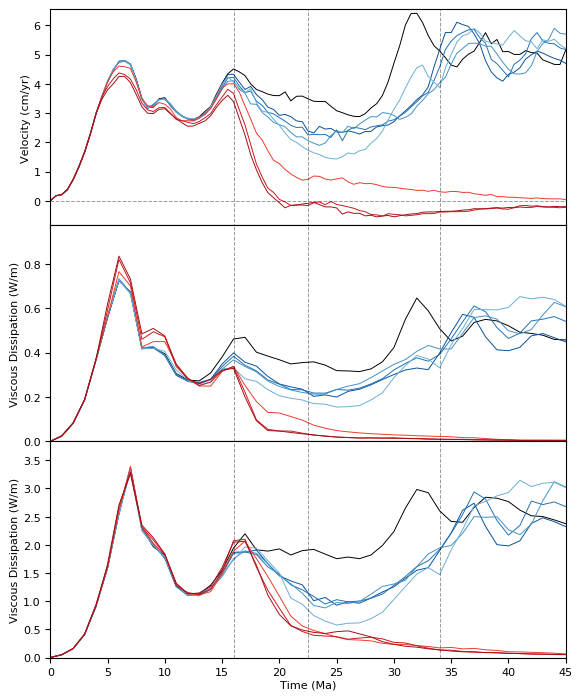

In [40]:
fig=plotIntegratedDiss_allTimesSingle_vel(seed1,seed2,[0,16,20,25,28,32,34,35],ColorsPlots,(15/2.54, 18/2.54))
fig

In [41]:
fig.savefig('/home/jovyan/user_data/Figs_PDF_Final/Fig9_raw.pdf')